<a href="https://colab.research.google.com/github/Ravneet7878/ML-Codes/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use("seaborn-v0_8")

In [ ]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

In [ ]:
# Data Normalization.

def normalization(X):
    u = X.mean(axis = 0)
    std = X.std(axis = 0)

    return (X - u) / std

In [ ]:
# Data Visualization.

def visualization(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("K - Means Clustering")
    plt.show()

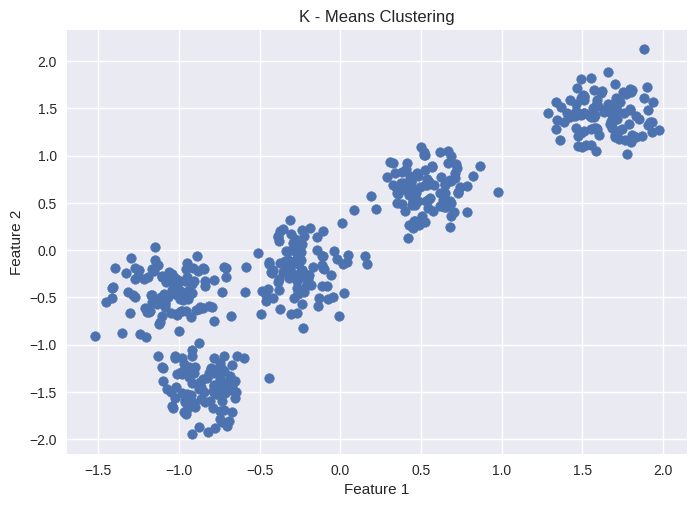

In [ ]:
X = normalization(X)
visualization(X)

In [ ]:
# Initializing K - Centers For K Clusters.

K = 5
n_features = 2

def initialize_centroids(X):
    centroids = {}

    colors = ["green", "magenta", "orange", "blue", "red"]

    for i in range(K):
        center = (2 * np.random.random((n_features, )) - 1) * 2

        centroids[i] = {
            "center" : center,
            "colors" : colors[i],
            "points" : []
        }

    return centroids

centroids = initialize_centroids(X)

In [ ]:
# Euclidean Distance Formula.

def distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [ ]:
# Assigning Points To The Nearest Clusters.

def assign_points_to_clusters(X, centroids):
    m = X.shape[0]

    # Each point will be assigned to only one cluster.

    for i in range(m):
        dist = []
        pt = X[i]

        # Distance of each point from every centroid.
        for j in range(K):
            d = distance(pt, centroids[j]["center"])
            dist.append(d)

        cluster_index = np.argmin(dist)

        # Assigning the point pt to it's nearest cluster.
        centroids[cluster_index]["points"].append(pt)

In [ ]:
# Updating The Location Of Centroids.

def update_clusters(centroids):

    # Update every centroid by taking a mean of points assigned to clusters.
    for i in range(K):
        points = np.array(centroids[i]["points"])

        if points.shape[0] > 0:
           new_center =  points.mean(axis = 0)
           centroids[i]["center"] = new_center

           # Emptying the points assigned to clusters.
           centroids[i]["points"] = []

In [ ]:
# Plotting The Clusters & There Centroids.

def plot_clusters(centroids):

    for i in range(K):
        points = np.array(centroids[i]["points"])

        # Plot the points.
        if points.shape[0] > 0:
           plt.scatter(points[:, 0], points[:, 1], color = centroids[i]["colors"])

        # Plot the cluster centers (Centroids).
        center = centroids[i]["center"]
        plt.scatter(center[0], center[1], color = "black", marker = "*")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("K - Means Clustering")
    plt.show()

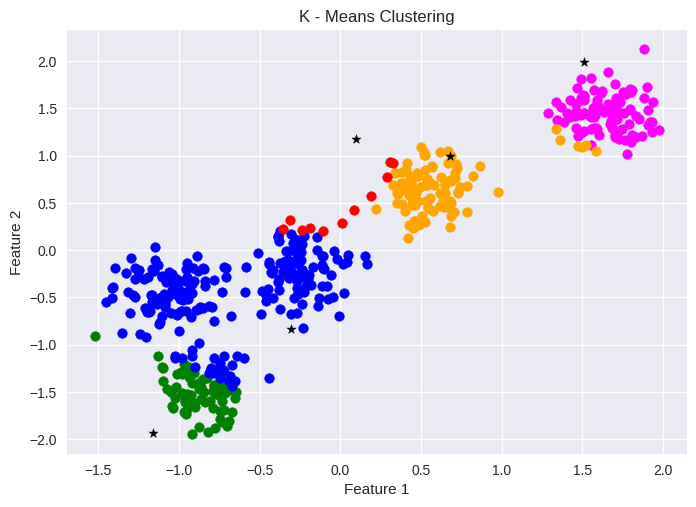

In [ ]:
assign_points_to_clusters(X, centroids)
plot_clusters(centroids)

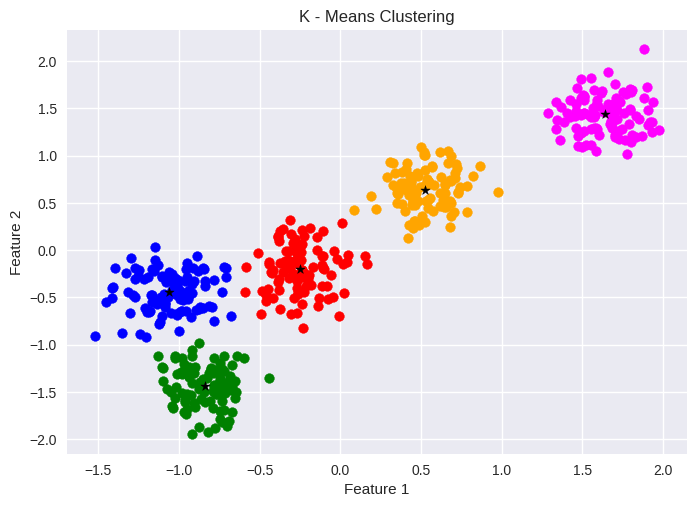

In [ ]:
assign_points_to_clusters(X, centroids)
plot_clusters(centroids)
update_clusters(centroids)